# Bài thực hành: Áp dụng các mô hình Học máy cơ bản

**Mục tiêu:**

* Thực hành quy trình chuẩn của một dự án học máy trên hai bộ dữ liệu thực tế.

* Áp dụng và so sánh hiệu suất của các mô hình đã học cho bài toán hồi quy và phân loại.

* Sử dụng **Scikit-learn** để huấn luyện, dự đoán và đánh giá mô hình.

* Trực quan hóa kết quả và đưa ra nhận xét.

**Công cụ:** Jupyter Notebook, Scikit-learn, Pandas, Matplotlib, Seaborn.

## Quy trình chuẩn của một dự án Học máy

Một dự án học máy điển hình không chỉ có bước huấn luyện mô hình, mà là một quy trình gồm nhiều giai đoạn lặp đi lặp lại.
1.  **Thu thập dữ liệu (Data Collection):** Tìm kiếm và thu thập dữ liệu thô từ nhiều nguồn khác nhau.
2.  **Tiền xử lý & Phân tích dữ liệu khám phá (Data Preprocessing & EDA):** Giai đoạn quan trọng nhất. Bao gồm làm sạch dữ liệu (xử lý giá trị thiếu, **giá trị ngoại lai - outliers**), chuẩn hóa, và khám phá dữ liệu để tìm ra các thông tin hữu ích ban đầu.
3.  **Lựa chọn & Huấn luyện mô hình (Model Selection & Training):** Dựa trên bài toán và dữ liệu, chọn ra một vài mô hình tiềm năng và huấn luyện chúng trên tập huấn luyện.
4.  **Đánh giá mô hình (Model Evaluation):** Sử dụng tập kiểm tra để đánh giá hiệu suất của các mô hình, chọn ra mô hình tốt nhất.
5.  **Tinh chỉnh tham số (Parameter Tuning):** Tối ưu hóa các tham số của mô hình tốt nhất để cải thiện hiệu suất.
6.  **Triển khai (Deployment):** Đưa mô hình vào môi trường thực tế để nó có thể đưa ra dự đoán trên dữ liệu mới.

## **Bài toán Hồi quy - Dự đoán giá nhà**

Sử dụng bộ dữ liệu **California Housing** có sẵn trong Scikit-learn để dự đoán giá trị trung bình của một căn nhà.

### **Khám phá dữ liệu (Exploratory Data Analysis - EDA)**
+ **a. Tải dữ liệu**

Sử dụng hàm `fetch_california_housing` từ `sklearn.datasets`.

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Tải dữ liệu
housing = fetch_california_housing()

# In mô tả bộ dữ liệu để hiểu rõ hơn
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

+ **b. Tìm hiểu dữ liệu**

Chuyển dữ liệu sang DataFrame của Pandas để dễ dàng thao tác và phân tích.

In [2]:
# Chuyển đổi sang Pandas DataFrame
df_housing = pd.DataFrame(data=housing.data, columns=housing.feature_names)
# Thêm cột biến mục tiêu (giá nhà) vào DataFrame
df_housing['MedHouseVal'] = housing.target

# Xem qua 5 dòng đầu tiên
print("5 dòng đầu tiên của dữ liệu:")
print(df_housing.head().to_string())


5 dòng đầu tiên của dữ liệu:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23        4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22        3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24        3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25        3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25        3.422


In [3]:

# Xem thông tin tổng quan (kiểu dữ liệu, số lượng non-null)
print("\nThông tin tổng quan về dữ liệu:")
print(df_housing.info())


Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [4]:

# Xem các thông số thống kê mô tả (mean, std, min, max,...)
print("\nCác thông số thống kê mô tả:")
print(df_housing.describe())


Các thông số thống kê mô tả:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
mi

+ **c. Trực quan hóa dữ liệu**

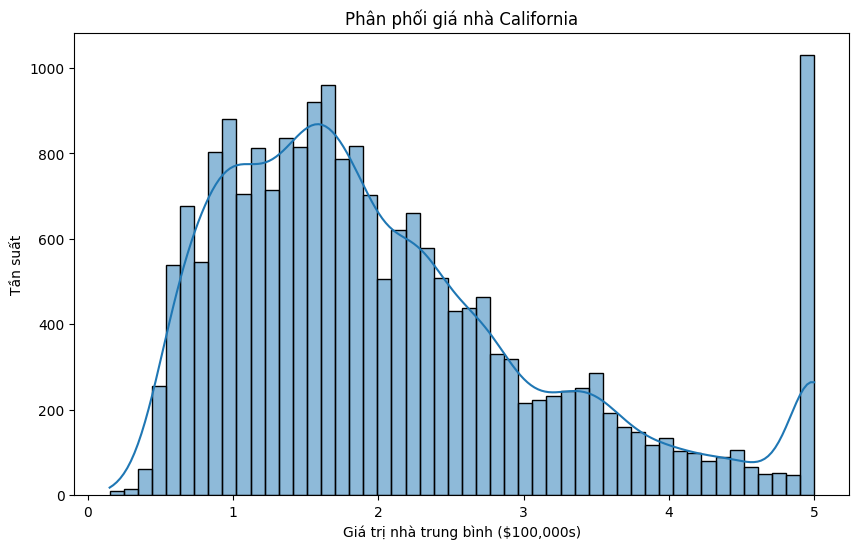

In [5]:
# 1. Trực quan hóa phân phối của giá nhà (biến mục tiêu) bằng histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_housing['MedHouseVal'], bins=50, kde=True)
plt.title('Phân phối giá nhà California')
plt.xlabel('Giá trị nhà trung bình ($100,000s)')
plt.ylabel('Tần suất')
plt.savefig('th_ml_image1.png')


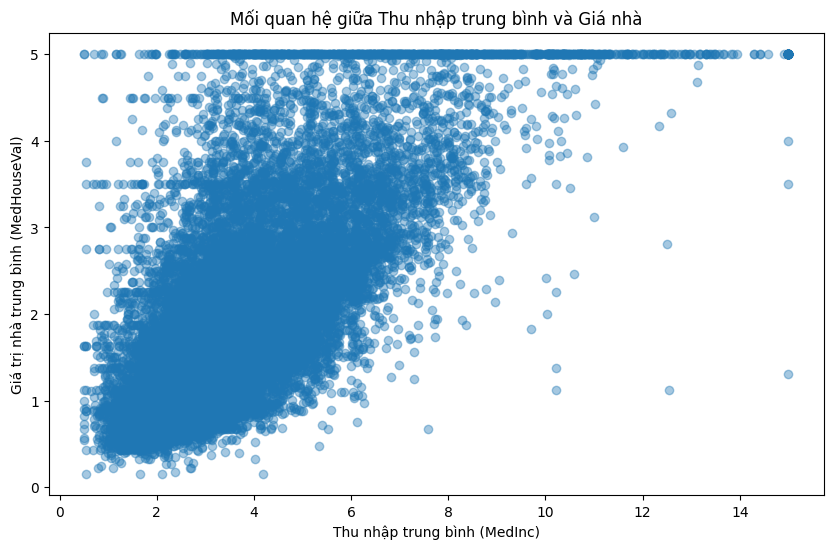

In [6]:

# 2. Vẽ biểu đồ scatter để xem mối quan hệ giữa thu nhập trung bình và giá nhà
plt.figure(figsize=(10, 6))
# Sử dụng alpha=0.4 để nhìn rõ hơn mật độ điểm dữ liệu
plt.scatter(df_housing['MedInc'], df_housing['MedHouseVal'], alpha=0.4)
plt.title('Mối quan hệ giữa Thu nhập trung bình và Giá nhà')
plt.xlabel('Thu nhập trung bình (MedInc)')
plt.ylabel('Giá trị nhà trung bình (MedHouseVal)')
plt.savefig('th_ml_image2.png')

### **Tiền xử lý dữ liệu (Data Preprocessing)**

+ **a. Chọn đặc trưng (features) và nhãn (label)**

    * `X` là tất cả các cột trừ cột giá nhà.

    * `y` là cột giá nhà (`MedHouseVal`).

In [7]:
X = df_housing.drop('MedHouseVal', axis=1)
y = df_housing['MedHouseVal']

+ **b. Chia Train-Test**

Chia dữ liệu thành hai tập: 80% cho huấn luyện (train) và 20% cho kiểm thử (test) để đánh giá mô hình một cách khách quan.

In [8]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu với tỷ lệ 80:20 và random_state để đảm bảo kết quả lặp lại
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

+ **c. Chuẩn hóa dữ liệu**

Các đặc trưng có thang đo khác nhau, việc chuẩn hóa giúp các mô hình (đặc biệt là Linear Regression và KNN) hoạt động hiệu quả hơn.

In [9]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo StandardScaler
scaler = StandardScaler()

# fit_transform trên X_train: Học các tham số (mean, std) từ tập train và biến đổi nó.
X_train_scaled = scaler.fit_transform(X_train)

# Chỉ transform trên X_test: Sử dụng các tham số đã học từ tập train để biến đổi tập test.
X_test_scaled = scaler.transform(X_test)

> **Giải thích:** Chúng ta **chỉ `fit` trên tập train** để tránh **rò rỉ dữ liệu (data leakage)**. Mô hình chỉ được phép "học" từ dữ liệu huấn luyện. Nếu chúng ta `fit` cả trên tập test, thông tin của tập test (như giá trị trung bình, độ lệch chuẩn) sẽ bị "rò rỉ" vào quá trình huấn luyện, khiến kết quả đánh giá mô hình trở nên quá lạc quan và không phản ánh đúng hiệu suất thực tế.

### **Huấn luyện và Đánh giá mô hình**

Huấn luyện 4 mô hình hồi quy và đánh giá bằng chỉ số **RMSE (Root Mean Squared Error)**. RMSE càng nhỏ, mô hình càng tốt.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Khởi tạo các mô hình
models = {
    "Linear Regression": LinearRegression(),
    "KNeighbors Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(max_depth=3, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=10, random_state=42)
}

# Lưu kết quả RMSE
rmse_results = {}

# Vòng lặp để huấn luyện và đánh giá từng mô hình
for name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train_scaled, y_train)
    
    # Dự đoán trên tập test
    y_pred = model.predict(X_test_scaled)
    
    # Tính RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_results[name] = rmse
    print(f"RMSE của mô hình {name}: {rmse:.4f}")

RMSE của mô hình Linear Regression: 0.7456
RMSE của mô hình KNeighbors Regressor: 0.6576
RMSE của mô hình Decision Tree: 0.8015
RMSE của mô hình Random Forest: 0.5326


### **Trực quan hóa và So sánh**

+ **a. Trực quan hóa mô hình tốt nhất**

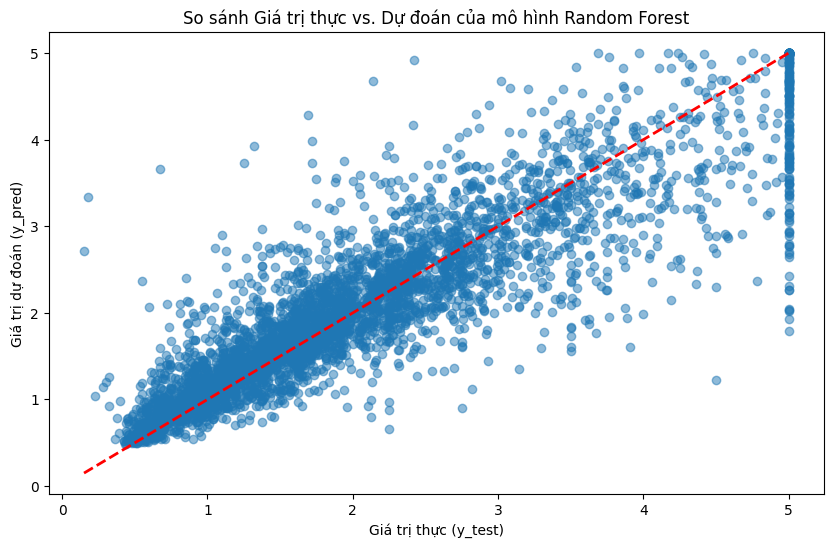

In [11]:
# Tìm mô hình có RMSE nhỏ nhất
best_model_name = min(rmse_results, key=rmse_results.get)
best_model = models[best_model_name]

# Dự đoán lại với mô hình tốt nhất để vẽ biểu đồ
y_pred_best = best_model.predict(X_test_scaled)

# Vẽ biểu đồ scatter so sánh giá trị thực và dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2) # Đường y=x (dự đoán hoàn hảo)
plt.title(f'So sánh Giá trị thực vs. Dự đoán của mô hình {best_model_name}')
plt.xlabel('Giá trị thực (y_test)')
plt.ylabel('Giá trị dự đoán (y_pred)')
plt.savefig('th_ml_image3.png')

+ **b. So sánh RMSE của các mô hình**

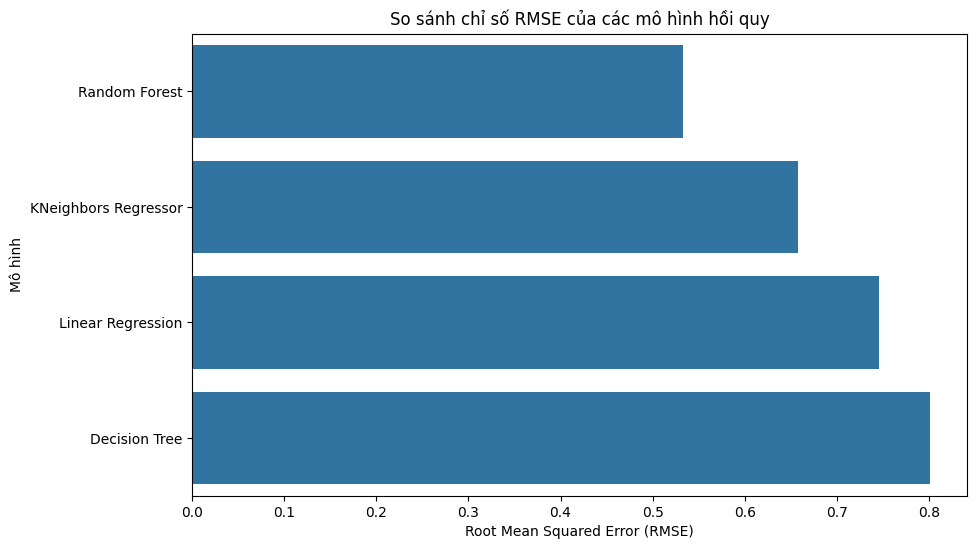

In [12]:
# Chuyển kết quả sang DataFrame để dễ vẽ
df_rmse = pd.DataFrame(list(rmse_results.items()), columns=['Model', 'RMSE']).sort_values('RMSE')

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=df_rmse)
plt.title('So sánh chỉ số RMSE của các mô hình hồi quy')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.ylabel('Mô hình')
plt.savefig('th_ml_image4.png')

+ **c. Câu hỏi thảo luận**

  * **Mô hình nào hoạt động tốt nhất?**

    * Dựa vào biểu đồ và kết quả, mô hình có RMSE thấp nhất (thanh ngắn nhất) là mô hình tốt nhất. Thông thường, Random Forest sẽ cho kết quả vượt trội.

  * **Tại sao có sự khác biệt về hiệu suất?**

    * **Linear Regression** giả định mối quan hệ tuyến tính, có thể quá đơn giản so với thực tế phức tạp của dữ liệu.

    * **Decision Tree** có thể học các mối quan hệ phi tuyến nhưng dễ bị *overfitting* (học quá đà) nếu không giới hạn độ sâu.

    * **Random Forest**, là một tập hợp của nhiều cây quyết định, giảm thiểu được vấn đề overfitting và nắm bắt được các mối quan hệ phức tạp, do đó thường cho kết quả tốt và ổn định hơn.

    * **KNN** dựa trên sự tương đồng, hiệu suất của nó phụ thuộc nhiều vào cấu trúc dữ liệu và việc lựa chọn `k`.

## **Bài toán Phân loại - Chẩn đoán khối u**

Sử dụng bộ dữ liệu **Breast Cancer** để phân loại khối u là "lành tính" (benign) hay "ác tính" (malignant).

### **Khám phá dữ liệu (EDA)**

+ **a. Tải dữ liệu**

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

+ **b. Tìm hiểu dữ liệu**

In [14]:
df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target # 0: malignant (ác tính), 1: benign (lành tính)

print(df_cancer.head())
df_cancer.info()

# Kiểm tra sự cân bằng của các lớp
print("\nPhân phối các lớp (0: ác tính, 1: lành tính):")
print(df_cancer['target'].value_counts())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

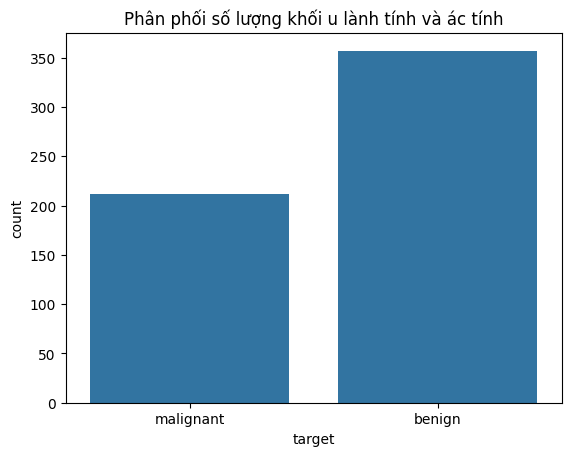

In [15]:

# Trực quan hóa sự cân bằng
sns.countplot(x='target', data=df_cancer)
plt.xticks(ticks=[0, 1], labels=cancer.target_names)
plt.title('Phân phối số lượng khối u lành tính và ác tính')
plt.savefig('th_ml_image5.png')

*Nhận xét: Bộ dữ liệu này khá cân bằng, thuận lợi cho việc huấn luyện mô hình.*

### **Tiền xử lý dữ liệu**

Các bước tương tự Phần 1, nhưng thêm `stratify` khi chia dữ liệu.

In [16]:
X_c = df_cancer.drop('target', axis=1)
y_c = df_cancer['target']

# Sử dụng stratify=y_c để đảm bảo tỷ lệ các lớp trong tập train và test là như nhau
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42, stratify=y_c)

scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

### **Huấn luyện và Đánh giá mô hình**

Đánh giá bằng **Accuracy, Precision, Recall** và **Confusion Matrix**.

--- Logistic Regression ---
Accuracy: 0.9825, Precision: 0.9762, Recall: 0.9762
--- KNeighbors Classifier ---
Accuracy: 0.9561, Precision: 0.9512, Recall: 0.9286
--- Decision Tree ---
Accuracy: 0.9386, Precision: 0.9268, Recall: 0.9048
--- Random Forest ---
Accuracy: 0.9386, Precision: 0.9070, Recall: 0.9286


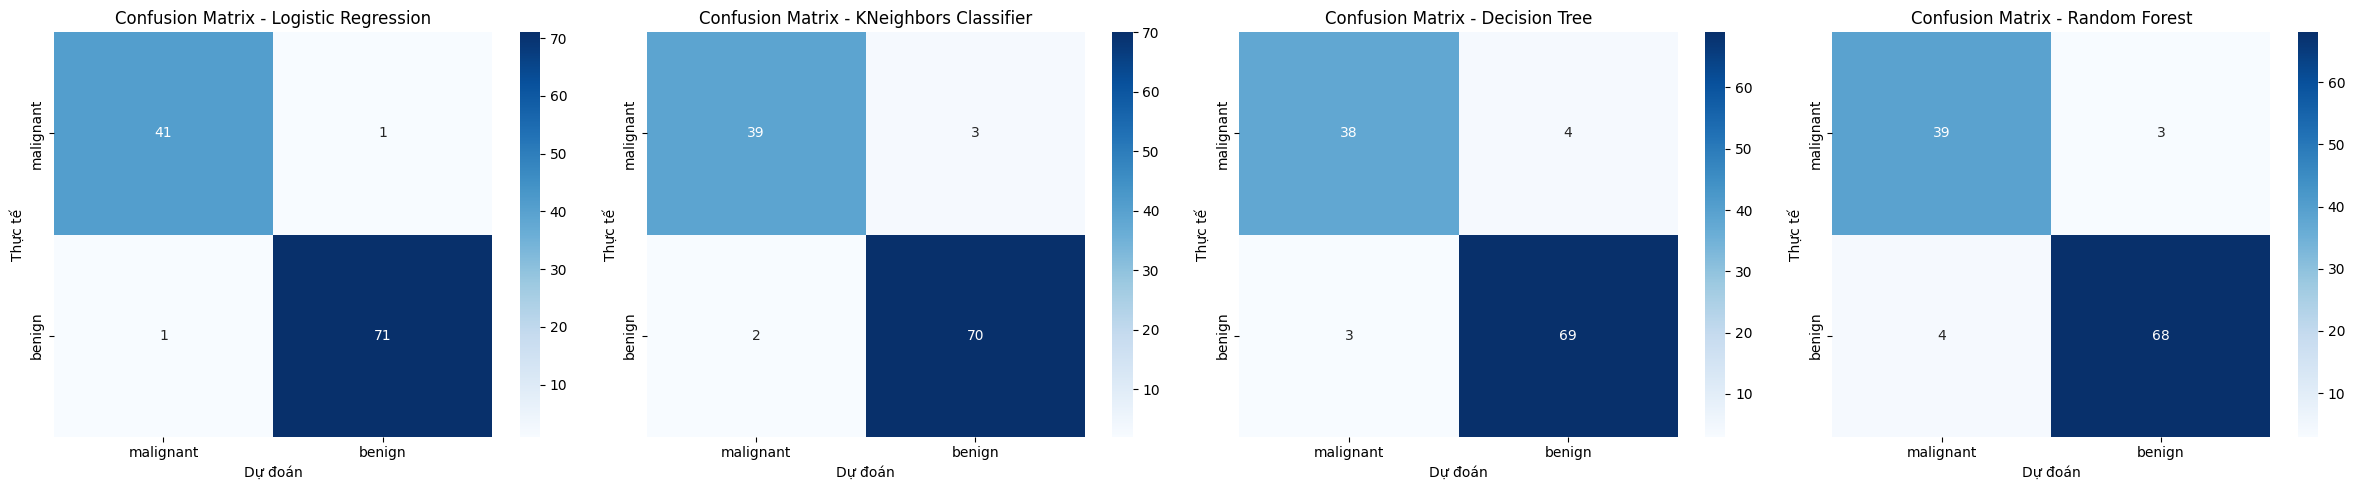

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

clf_models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=10, random_state=42)
}

fig, axes = plt.subplots(1, 4, figsize=(24, 5)) 

clf_results = []

# Sử dụng enumerate để lấy cả chỉ số (i) và item trong vòng lặp
for i, (name, model) in enumerate(clf_models.items()):
    model.fit(X_train_c_scaled, y_train_c)
    y_pred_c = model.predict(X_test_c_scaled)
    
    acc = accuracy_score(y_test_c, y_pred_c)
    prec = precision_score(y_test_c, y_pred_c, pos_label=0) 
    rec = recall_score(y_test_c, y_pred_c, pos_label=0)
    
    clf_results.append({'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec})
    
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")
    
    # 2. Vẽ Ma trận nhầm lẫn lên subplot tương ứng (axes[i])
    cm = confusion_matrix(y_test_c, y_pred_c)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=cancer.target_names, yticklabels=cancer.target_names,
                ax=axes[i]) # <--- Chỉ định subplot để vẽ
    
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Dự đoán')
    axes[i].set_ylabel('Thực tế')

# 3. Điều chỉnh layout cho đẹp và hiển thị/lưu figure
plt.tight_layout() # Tự động điều chỉnh khoảng cách giữa các subplot
plt.savefig('all_confusion_matrices.png') # Lưu cả figure chứa 3 ma trận
plt.show() # Hiển thị figure

### **Trực quan hóa và Bàn luận**

+ **a. Bảng so sánh các chỉ số**

In [18]:
df_clf_results = pd.DataFrame(clf_results)
print(df_clf_results)

                   Model  Accuracy  Precision    Recall
0    Logistic Regression  0.982456   0.976190  0.976190
1  KNeighbors Classifier  0.956140   0.951220  0.928571
2          Decision Tree  0.938596   0.926829  0.904762
3          Random Forest  0.938596   0.906977  0.928571


+ **b. Trực quan hóa cây quyết định**

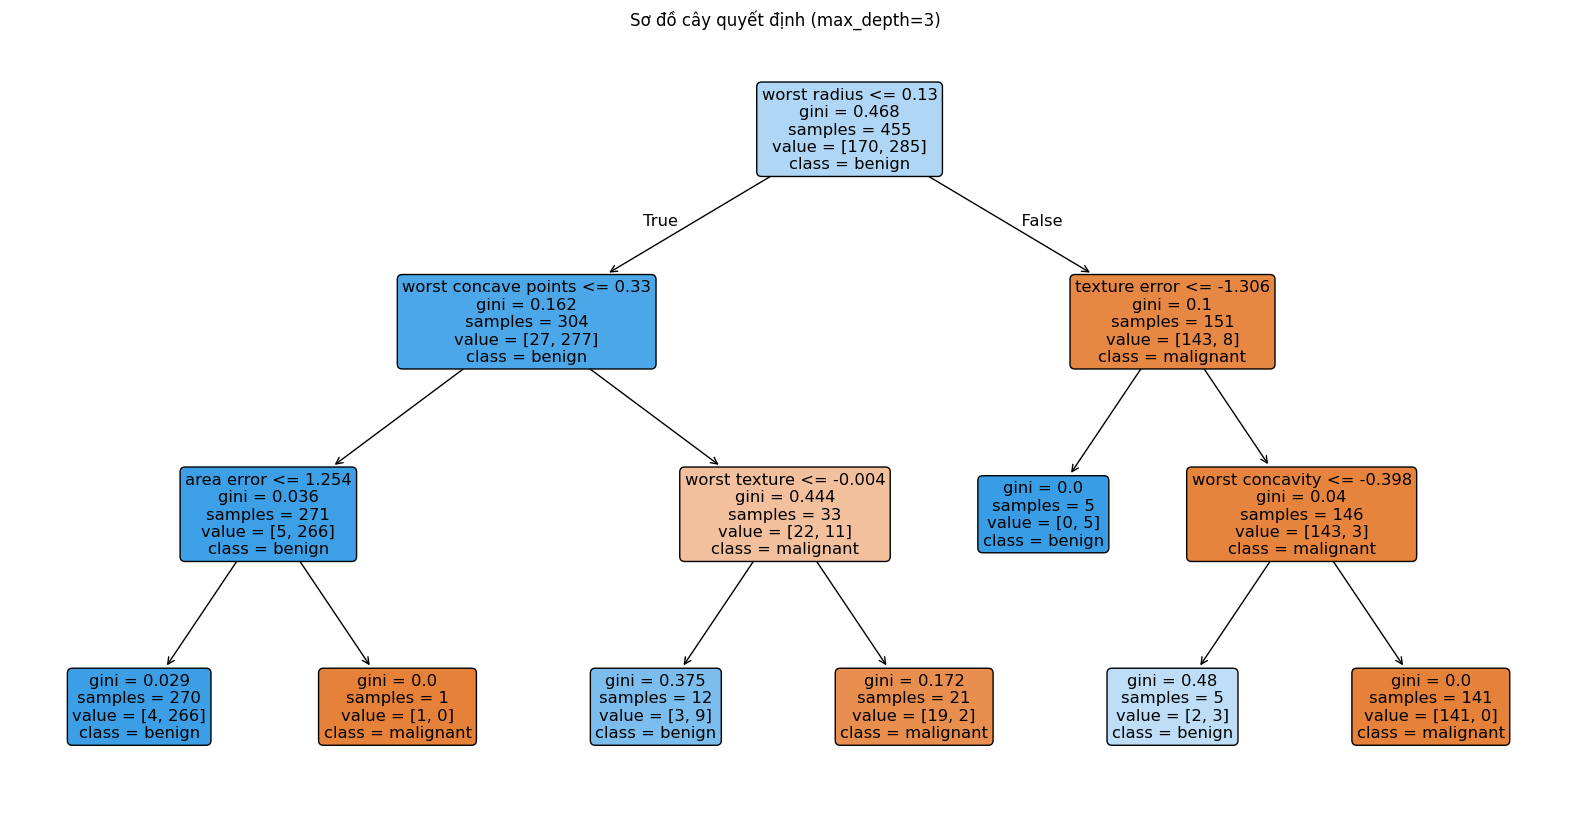

In [19]:
from sklearn.tree import plot_tree

dt_model = clf_models['Decision Tree']
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=cancer.feature_names, 
          class_names=cancer.target_names, 
          filled=True, 
          rounded=True)
plt.title("Sơ đồ cây quyết định (max_depth=3)")
plt.savefig('th_ml_image10.png')

+ **c. Vẽ đường cong ROC và tính AUC**

**ROC Curve** và **AUC** là công cụ mạnh mẽ để đánh giá hiệu suất tổng thể của mô hình phân loại. AUC càng gần 1, mô hình càng tốt.

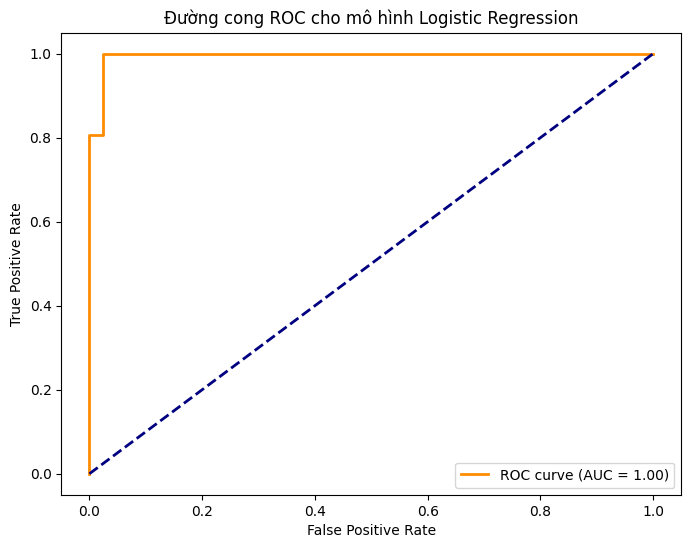

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

log_reg = clf_models['Logistic Regression']
# Lấy xác suất dự đoán cho lớp dương (lớp 1 - benign)
y_pred_proba = log_reg.predict_proba(X_test_c_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_c, y_pred_proba)
auc_score = roc_auc_score(y_test_c, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Đường đoán ngẫu nhiên
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC cho mô hình Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('th_ml_image11.png')

+**d. Câu hỏi thảo luận**

* **Trong bài toán y tế này, chỉ số Precision hay Recall quan trọng hơn? Tại sao?**

  * **Recall** quan trọng hơn rất nhiều. Mục tiêu chính là **phát hiện được tối đa các ca bệnh ác tính**, tức là giảm thiểu **False Negative** (dự đoán "lành tính" trong khi thực tế là "ác tính"). Bỏ sót một ca bệnh ác tính (Recall thấp) có thể gây hậu quả nghiêm trọng. Chẩn đoán nhầm một ca lành tính thành ác tính (Precision thấp) ít nguy hiểm hơn vì bệnh nhân sẽ được thực hiện các xét nghiệm sâu hơn để khẳng định lại.

* **Dựa vào Ma trận nhầm lẫn, mô hình nào làm tốt nhất việc tránh bỏ sót ca bệnh (giảm False Negative)?**

  * Hãy nhìn vào ô **"Thực tế: malignant, Dự đoán: benign"** trong ma trận nhầm lẫn của mỗi mô hình. Mô hình nào có con số ở ô này là **thấp nhất** (lý tưởng là 0) chính là mô hình làm tốt nhất việc giảm False Negative.

### **Bài tập nâng cao (Tùy chọn)**

1. **Thử nghiệm với các tham số khác nhau (Hyperparameter Tuning):**

   * Thay đổi `k` trong `KNeighborsClassifier` (ví dụ `k=3, 7, 9`) và xem Accuracy/Recall thay đổi thế nào.

   * Tăng `max_depth` trong `DecisionTreeRegressor` và xem RMSE trên tập test. Liệu có bị overfitting không? (RMSE trên tập train rất thấp nhưng trên tập test lại cao).

2. **So sánh đường cong ROC của tất cả các mô hình phân loại:**

   * Vẽ đường cong ROC của cả 4 mô hình phân loại trên cùng một biểu đồ. Điều này sẽ cho một cái nhìn trực quan và toàn diện về hiệu suất của chúng. Mô hình có đường cong gần góc trên bên trái nhất và AUC lớn nhất sẽ là mô hình tốt nhất.

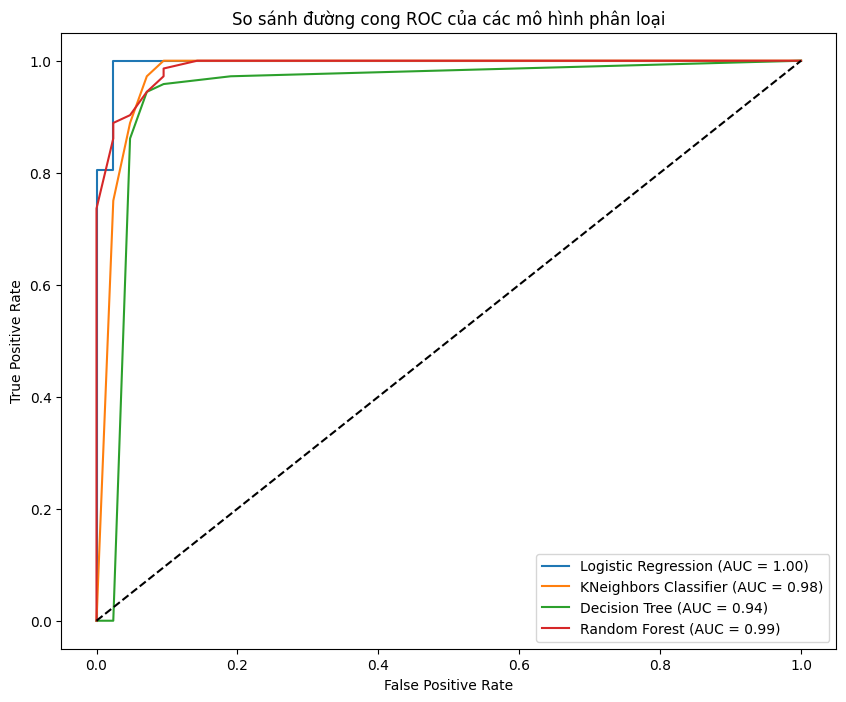

In [21]:
# Gợi ý cho bài tập nâng cao
plt.figure(figsize=(10, 8))
for name, model in clf_models.items():
    y_pred_proba = model.predict_proba(X_test_c_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_c, y_pred_proba)
    auc_score = roc_auc_score(y_test_c, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('So sánh đường cong ROC của các mô hình phân loại')
plt.legend()
plt.savefig('th_ml_image12.png')